**Spark Data Analysis**

I. Data Procesing and Preparation

In [1]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 200 kB 46.7 MB/s 
     |████████████████████████████████| 199 kB 51.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=a92d41b011b13dfa218e42f1f36be62dd1a03672f6f12a017168fc43762b7f82
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [3]:
spark = SparkSession.builder.master("local[*]").appName("UNSW_NB15_Analysis").getOrCreate()

In [4]:
# Creating the Schema based on the given csv file
df_schema = StructType([
      StructField("srcip",StringType(),True),
      StructField("sport",IntegerType(),True),
      StructField("dstip",StringType(),True),
      StructField("dsport",IntegerType(),True),
      StructField("proto",StringType(),True),
      StructField("State",StringType(),True),
      StructField("dur",FloatType(),True),
      StructField("sbytes",IntegerType(),True),
      StructField("dbytes",IntegerType(),True),
      StructField("sttl",IntegerType(),True),
      StructField("dttl",IntegerType(),True),
      StructField("sloss",FloatType(),True),
      StructField("dloss",FloatType(),True),
      StructField("service",StringType(),True),
      StructField("sload",FloatType(),True),
      StructField("dload",FloatType(),True),
      StructField("spkts",IntegerType(),True),
      StructField("dpkts",IntegerType(),True),
      StructField("swin",IntegerType(),True),
      StructField("dwin",IntegerType(),True),
      StructField("stcpb",IntegerType(),True),
      StructField("dtcpb",IntegerType(),True),
      StructField("smeansz",IntegerType(),True),
      StructField("dmeansz",IntegerType(),True),
      StructField("trans_depth",IntegerType(),True),
      StructField("res_bdy_len",IntegerType(),True),
      StructField("sjit",FloatType(),True),
      StructField("djit",FloatType(),True),
      StructField("stime",StringType(),True),
      StructField("ltime",StringType(),True),
      StructField("sintpkt",FloatType(),True),
      StructField("dintpkt",FloatType(),True),
      StructField("tcprtt",FloatType(),True),
      StructField("synack",FloatType(),True),
      StructField("ackdat",FloatType(),True),
      StructField("is_sm_ips_ports",IntegerType(),True),
      StructField("ct_state_ttl",IntegerType(),True),
      StructField("ct_flw_http_mthd",IntegerType(),True),
      StructField("is_ftp_login",IntegerType(),True),
      StructField("ct_ftp_cmd",IntegerType(),True),
      StructField("ct_srv_src",IntegerType(),True),
      StructField("ct_srv_dst",IntegerType(),True),
      StructField("ct_dst_ltm",IntegerType(),True),
      StructField("ct_src_ltm",IntegerType(),True),
      StructField("ct_src_dport_ltm",IntegerType(),True),
      StructField("ct_dst_sport_ltm",IntegerType(),True),
      StructField("ct_dst_src_ltm",IntegerType(),True),
      StructField("attack_cat",StringType(),True),
      StructField("label",IntegerType(),True)])

In [5]:
# Reading data from storage providing the schema
df = spark.read.format("csv") \
      .option("header", True) \
      .schema(df_schema) \
      .load("/content/drive/MyDrive/UNSW_NB15_datasets/UNSW-NB15.csv")

In [ ]:
df.printSchema()

root
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- State: string (nullable = true)
 |-- dur: float (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: float (nullable = true)
 |-- dloss: float (nullable = true)
 |-- service: string (nullable = true)
 |-- sload: float (nullable = true)
 |-- dload: float (nullable = true)
 |-- spkts: integer (nullable = true)
 |-- dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: integer (nullable = true)
 |-- dtcpb: integer (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_len: integer (nullable = true)
 |-- sj

In [ ]:
df.show(10)

+----------+-----+-------------+------+-----+-----+--------+------+------+----+----+-----+-----+--------+---------+---------+-----+-----+----+----+---------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+--------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     srcip|sport|        dstip|dsport|proto|State|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    sload|    dload|spkts|dpkts|swin|dwin|    stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     sjit|     djit|     stime|     ltime|  sintpkt| dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|label|
+----------+-----+-------------+------+-----+-----+-

In [ ]:
# To show how many rows exist
df.count()

2539738

**II. Data Preprocessing / Cleaning**

**II.A** Deleting duplicates and filling missing rows 

In [6]:
import pyspark.sql.functions as fn

In [ ]:
# Checking if there are duplicate rows.
print('Count of rows: {}'.format(df.count()))
print('Count of distinct rows: {}'.format(df.distinct().count()))

Count of rows: 2539738
Count of distinct rows: 2059114


In [7]:
# Drop rows with duplicate
df = df.dropDuplicates()

In [ ]:
print('Count of rows: {}'.format(df.count()))
print('Count of distinct rows: {}'.format(df.distinct().count()))

Count of rows: 2059114
Count of distinct rows: 2059114


In [ ]:
# Count if there are missing value
df.agg(*[(1 - (fn.count(c) / fn.count('*'))).alias(c + '_missing') for c in df.columns]).show()

+-------------+-------------+-------------+--------------+-------------+-------------+-----------+--------------+--------------+------------+------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+------------+------------+-------------------+------------------+---------------+---------------+-------------------+-------------------+------------+------------+-------------+-------------+---------------+---------------+--------------+--------------+--------------+-----------------------+--------------------+------------------------+--------------------+------------------+------------------+------------------+------------------+------------------+------------------------+------------------------+----------------------+------------------+-------------+
|srcip_missing|sport_missing|dstip_missing|dsport_missing|proto_missing|State_missing|dur_missing|sbytes_missing|dbytes_missing|sttl_missing|dttl_missing|sloss_missing|dloss_missing|ser

As a result there is missing values on stcpb, dtcpb, and attack_cat columns. I first resolve the NA column in attack_cat by filling those missing value as a Normal category.

In [8]:
# fill null attack cat
df = df.na.fill("Normal","attack_cat")

In [ ]:
# Checking distinct categories and their value
df.groupby("attack_cat").count().show()

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|          Worms|    171|
|      Shellcode|    223|
|      Backdoors|    299|
|        Fuzzers|   3991|
|       Analysis|   2184|
|     Shellcode |   1288|
|            DoS|   5665|
|Reconnaissance |  11617|
| Reconnaissance|   1740|
|       Backdoor|   1684|
|       Fuzzers |  17804|
|       Exploits|  27599|
|         Normal|1959471|
|        Generic|  25378|
+---------------+-------+



There seem to have a discrepancy in the data that some categories appear twice. I subjected this discrepancy to Multi-class classification.

In [9]:
from pyspark.ml.feature import Imputer

In [10]:
# Imputing null value in stcpb and dctpb with mean
imputer = Imputer(
    inputCols=["stcpb","dtcpb"],
    outputCols=[c for c in ["stcpb","dtcpb"]]
).setStrategy("mean")

In [11]:
imputed_df = imputer.fit(df).transform(df)

In [ ]:
imputed_df.show()

+-------------+-----+-------------+------+-----+-----+---------+------+------+----+----+-----+-----+-------+------------+-----------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+---------+--------+--------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|        srcip|sport|        dstip|dsport|proto|State|      dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|       sload|      dload|spkts|dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     sjit|     djit|     stime|     ltime|  sintpkt|  dintpkt|  tcprtt|  synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|label|
+-------------+-----+-------

**II.B** Selecting necessary columns to avoid data inconsistency.

Some columns that is related to the hardware specification and date are being removed, as well as the additional generated features.

In [12]:
# Selecting column name that will use for statistic analysis
prepro_cols = ["dur", "proto", "service", "state", "spkts", "dpkts", "sbytes", "dbytes", "sttl", "dttl", "sload", "dload", "sloss", "dloss", "sintpkt", "dintpkt", "sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "attack_cat", "label"]

**III. Data preparation for ML training**


**III.A** 
Features String Indexing and OneHotEncoder

In [13]:
import pyspark.ml.feature as ft
from pyspark.ml import Pipeline

In [14]:
# Method for string indexer and OneHotEncoding
def features_encoding(string_columns,int_columns, df):
  # for str type
  indexers = [ft.StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)) for c in string_columns]

  encoders = [ft.StringIndexer(inputCol = indexer.getOutputCol(), outputCol = "{0}_encoded".format(indexer.getOutputCol()))
  for indexer in indexers]

  assemblerStr = ft.VectorAssembler(inputCols = [encoder.getOutputCol() for encoder in encoders], outputCol = "str")

  pipelineStr = Pipeline(stages = indexers + encoders + [assemblerStr])
  df = pipelineStr.fit(df).transform(df)

  # For int type
  assemblerInt = ft.VectorAssembler(inputCols = int_columns, outputCol = "int")

  pipelineInt = Pipeline(stages = [assemblerInt])
  df = pipelineInt.fit(df).transform(df)

  assembler = ft.VectorAssembler(inputCols = ["str", "int"], outputCol = "features")

  pipeline = Pipeline(stages = [assembler])
  encoded_df = pipeline.fit(df).transform(df)
  return encoded_df

In [15]:
# Extract string and int for indexing and encoding preparation except for service
def split_str_int(df):
  string_columns = [c[0] for c in df.dtypes if 'string' in c and c in prepro_cols]
  int_columns = [c[0] for c in df.dtypes if 'int' in c or 'float' in c and  c in prepro_cols]
  return [string_columns, int_columns]

# execute split function to extract type of columns
str_col, int_col = split_str_int(imputed_df)

# Extract features column name
all_features_name = str_col + int_col

# For labeled service
encoded_df = features_encoding(str_col, int_col, imputed_df)
encoded_df.groupby('service').count().show()

+--------+-------+
| service|  count|
+--------+-------+
|     ftp|  45074|
|ftp-data| 124849|
|     dns| 386755|
|    smtp|  81132|
|    http| 203531|
|  radius|     37|
|     ssl|    142|
|       -|1168877|
|     irc|     31|
|    dhcp|    102|
|    snmp|    113|
|    pop3|   1490|
|     ssh|  46981|
+--------+-------+



In [ ]:
encoded_df.show(10)

+-------------+-----+-------------+------+-----+-----+---------+------+------+----+----+-----+-----+-------+------------+-----------+-----+-----+----+----+----------+---------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+---+--------------------+--------------------+
|        srcip|sport|        dstip|dsport|proto|State|      dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|       sload|      dload|spkts|dpkts|swin|dwin|     stcpb|    dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     sjit|     djit|     stime|     ltime|  sintpkt|  dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack

**IV. Multi-class Classification**


**IV.A.** 
Splitting service column

In [16]:
# Method for indexing service column that is labeled
def service_indexer(df):
  indexer = ft.StringIndexer(inputCol='service', outputCol='service_int')
  indexer_fitted = indexer.fit(df)
  service_ind = indexer_fitted.transform(df)
  return service_ind

In [17]:
# spliting labeled and unlabeled service
unlabeled_service = encoded_df.filter(df.service == '-')
labeled_service = encoded_df.filter(df.service != '-')

# Indexing service labeled column
indexed_service = service_indexer(labeled_service)

# creating new df with selected column for correlation
multi_class_df = indexed_service.select(["features","service_int"])

In [ ]:
multi_class_df.groupby('service_int').count().show()

+-----------+------+
|service_int| count|
+-----------+------+
|        8.0|   113|
|        0.0|386755|
|        7.0|   142|
|        1.0|203531|
|        4.0| 46981|
|       11.0|    31|
|        3.0| 81132|
|        2.0|124849|
|       10.0|    37|
|        6.0|  1490|
|        5.0| 45074|
|        9.0|   102|
+-----------+------+



**IV.B.** Find Correlation between service column and other selected columns

In [18]:
import pyspark.ml.stat as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
# Creating method for column assembler for features extraction
def vector_assembler(df, cols, new_col):
  assembler = ft.VectorAssembler(inputCols = cols, outputCol = new_col)
  pipeline = Pipeline(stages = [assembler])
  encoded = pipeline.fit(df).transform(df)
  return encoded

In [20]:
# Preparing data for correlation by creating equivalent array matrix by combining features and label variable service_int
encoded_cor = vector_assembler(multi_class_df, ["features","service_int"], "corr_columns")

# Saving into variable and selecting the first index of the result
matrix = st.Correlation.corr(encoded_cor, "corr_columns").collect()[0][0]

In [21]:
# Convert feature matrix into dataframe
corrMatrix = matrix.toArray().tolist()
df_corr = spark.createDataFrame(corrMatrix,all_features_name + ["service"])
df_corr.show(10)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|               sport|              dsport|              sbytes|              dbytes|                sttl|                dttl|               spkts|               dpkts|                swin|                dwin|               stcpb|               dtcpb|             smeansz|             dmeansz|         trans_depth|         res_bdy_len|is_sm_ips_ports|        ct_state_ttl

**IV.C.** 
Plotting the correlation using seaborn

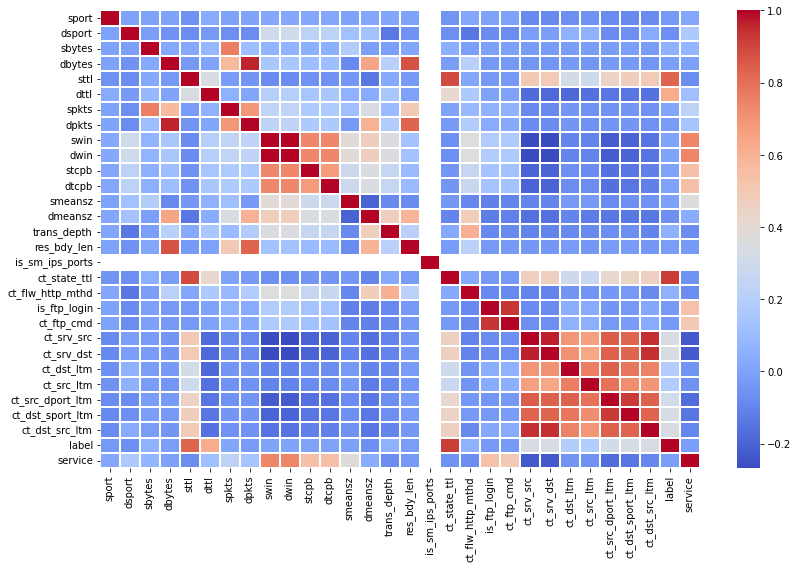

In [22]:
%matplotlib inline
corr_plot = df_corr.toPandas()
fig, axes = plt.subplots(figsize=(12,8))
ax = plt.axes()
ax = sns.heatmap(corr_plot,cmap='coolwarm',linecolor='white',linewidths=1)
ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=360,
    horizontalalignment='right'
);
plt.tight_layout()

In [ ]:
for i, row in enumerate(corr_plot["service"]):
  if row > 0 and row < 1:
    print(all_features_name[i], ": ",row)


dur :  0.13455568644244664
spkts :  0.22882545829215292
dpkts :  0.1384900465411822
sbytes :  0.07777547328121397
dttl :  0.11441898641520461
dload :  0.09576671407521797
sloss :  0.17966291987646407
dloss :  0.06973523580087788
sintpkt :  0.03551927422835679
dintpkt :  0.04344604129387843
sjit :  0.05062625007200671
swin :  0.7378925880241389
stcpb :  0.5415075844029789
dtcpb :  0.5422413756807171
dwin :  0.7378737780275246
tcprtt :  0.09366211695969304


Only 16 rows are correlated with service column thus this column will be save to a variable for training the multi class model

In [23]:
multi_columns = [all_features_name[i] for i, row in enumerate(corr_plot["service"]) if row > 0 and row <1]

In [ ]:
# Selected column processing for ML Multi Classification training
print(multi_columns)

['dur', 'spkts', 'dpkts', 'sbytes', 'dttl', 'dload', 'sloss', 'dloss', 'sintpkt', 'dintpkt', 'sjit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt']


In [24]:
# re-preprocessing df for labeled service
# Dropping previous features column to recreate base on the result of the correlation
indexed_service = indexed_service.drop("features")

# Split labeled and unlabeled service
split_df = indexed_service.filter(df.service != '-')

# Recreating features column
multi_df = vector_assembler(split_df, multi_columns, "features")

In [ ]:
multi_df.groupby('service_int').count().show()

+-----------+------+
|service_int| count|
+-----------+------+
|        8.0|   113|
|        0.0|386755|
|        7.0|   142|
|        1.0|203531|
|        4.0| 46981|
|       11.0|    31|
|        3.0| 81132|
|        2.0|124849|
|       10.0|    37|
|        6.0|  1490|
|        5.0| 45074|
|        9.0|   102|
+-----------+------+



**V. Fitting and training the Model**

In [25]:
import pyspark.ml.classification as cl
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.util import MLUtils
from pyspark.mllib.evaluation import MulticlassMetrics

***V.A. Decision Tree Classifier***

In [26]:
# Split for train and test
df_train, df_test = multi_df.randomSplit([0.7,0.3], seed=88)

# Classifier
dt = cl.DecisionTreeClassifier(
    maxDepth=5,
    maxBins=134,
    featuresCol="features",
    labelCol='service_int'
)

# Train model with Training Data
dtModel = dt.fit(df_train)
dtpredictions = dtModel.transform(df_test)
dtpredictions.filter(dtpredictions['prediction'] == 0) \
    .select("features","service_int","probability","prediction","rawPrediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-----------+------------------------------+----------+------------------------------+
|                      features|service_int|                   probability|prediction|                 rawPrediction|
+------------------------------+-----------+------------------------------+----------+------------------------------+
|(14,[0,1,2,4,10],[33631.0,5...|        0.0|[1.0,0.0,0.0,0.0,0.0,0.0,0....|       0.0|[270767.0,0.0,0.0,0.0,0.0,0...|
|(14,[0,1,2,4,10],[38657.0,5...|        0.0|[1.0,0.0,0.0,0.0,0.0,0.0,0....|       0.0|[270767.0,0.0,0.0,0.0,0.0,0...|
|(14,[0,1,2,4,10],[40385.0,5...|        0.0|[1.0,0.0,0.0,0.0,0.0,0.0,0....|       0.0|[270767.0,0.0,0.0,0.0,0.0,0...|
|(14,[0,1,2,4,10],[42707.0,5...|        0.0|[1.0,0.0,0.0,0.0,0.0,0.0,0....|       0.0|[270767.0,0.0,0.0,0.0,0.0,0...|
|(14,[0,1,2,4,10],[46811.0,5...|        0.0|[1.0,0.0,0.0,0.0,0.0,0.0,0....|       0.0|[270767.0,0.0,0.0,0.0,0.0,0...|
|(14,[0,1,2,4,10],[52858.0,5...|        0.0|[1.0,0.0,0.0

In [27]:
# Evaluate model
dtevaluator = MulticlassClassificationEvaluator(predictionCol="prediction").setLabelCol("service_int")
print('Accuracy:', dtevaluator.evaluate(dtpredictions))

Accuracy: 0.9998124993165051


***V.B. Random Forrest Classifier***

In [28]:
# Random forrest
# Split for train and test
df_train, df_test = multi_df.randomSplit([0.7,0.3], seed=88)

rf = cl.RandomForestClassifier(labelCol="service_int", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 5, \
                            maxBins = 134)

# Train model with Training Data
rfModel = rf.fit(df_train)
rfpredictions = rfModel.transform(df_test)
rfpredictions.filter(rfpredictions['prediction'] == 0) \
    .select("features","service_int","probability","prediction","rawPrediction") \
    .orderBy("probability", ascending=False) \
    .show(n = 10, truncate = 30)

+------------------------------+-----------+------------------------------+----------+------------------------------+
|                      features|service_int|                   probability|prediction|                 rawPrediction|
+------------------------------+-----------+------------------------------+----------+------------------------------+
|(14,[0,1,2,3,4,5,10,11],[10...|        0.0|[0.9999187037455587,7.38874...|       0.0|[99.99187037455589,7.388745...|
|(14,[0,1,2,3,4,5,10,11],[11...|        0.0|[0.9999187037455587,7.38874...|       0.0|[99.99187037455589,7.388745...|
|(14,[0,1,2,3,4,5,10,11],[10...|        0.0|[0.9999187037455587,7.38874...|       0.0|[99.99187037455589,7.388745...|
|(14,[0,1,2,3,4,5,10,11],[10...|        0.0|[0.9999187037455587,7.38874...|       0.0|[99.99187037455589,7.388745...|
|(14,[0,1,2,3,4,5,10,11],[10...|        0.0|[0.9999187037455587,7.38874...|       0.0|[99.99187037455589,7.388745...|
|(14,[0,1,2,3,4,5,10,11],[10...|        0.0|[0.999918703

In [29]:
# Evaluate rf model
rfevaluator = MulticlassClassificationEvaluator(predictionCol="prediction").setLabelCol("service_int")
print('Accuracy:', rfevaluator.evaluate(rfpredictions))

Accuracy: 0.9957400783605151


**V.C. Using cross validation for both ML Algorithm**

In [ ]:
# Cross validate and Evaluate Decision Tree model
dt2 = cl.DecisionTreeClassifier(
    maxDepth=5,
    maxBins=134,
    featuresCol="features",
    labelCol='service_int'
)

dtparamGrid = (ParamGridBuilder()
             .addGrid(dt2.maxDepth, [5, 10, 15, 30, 50])
             .addGrid(dt2.maxBins, [134, 150, 163, 185, 200])
             .build())

dtevaluator = MulticlassClassificationEvaluator(predictionCol="prediction").setLabelCol("service_int")

dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = dtevaluator,
                      numFolds = 5)

dt2Model = dt.fit(df_train)
dt2predictions = dt2Model.transform(df_test)
print('Accuracy:', dtevaluator.evaluate(dt2predictions))
# lrmetrics = MulticlassMetrics(dt2predictions['service_int','prediction'].rdd)
# print('F1 Score:', lrmetrics.fMeasure(1.0,1.0))

Accuracy: 0.9998106283295448


In [ ]:
# Cross Validate and Evaluate Random Forrest model
rf2 = cl.RandomForestClassifier(labelCol="service_int", \
                            featuresCol="features", \
                            numTrees = 100, \
                            maxDepth = 5, \
                            maxBins = 134)

rfparamGrid = (ParamGridBuilder()
             .addGrid(rf2.maxDepth, [5, 10, 15, 30, 50])
             .addGrid(rf2.maxBins, [134, 150, 163, 185, 200])
             .addGrid(rf2.numTrees, [100, 120, 140, 160, 180])
             .build())

rfevaluator2 = MulticlassClassificationEvaluator(predictionCol="prediction").setLabelCol("service_int")
rfcv = CrossValidator(estimator = rf2,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = rfevaluator2,
                      numFolds = 5)

rf2Model = rf2.fit(df_train)
rf2predictions = rf2Model.transform(df_test)

print('Accuracy:', rfevaluator2.evaluate(rf2predictions))
# lrmetrics = MulticlassMetrics(rf2predictions['service_int','prediction'].rdd)
# print('F1 Score:', lrmetrics.fMeasure(1.0,1.0))

Accuracy: 0.9971563903962285


**VI. Result**

As the final result, the Decision Tree that underwent Cross Validation has a higher percentage of accuracy with 99.9%. Therefore the model will be used to produce a new dataset.

In [ ]:
# Training unlabeled service using Decision Tree Classifier with Cross Validation
service_pred = dt2Model.transform(unlabeled_service)
service_pred.select(["rawPrediction", "probability","prediction"]).show(10)

+--------------------+--------------------+----------+
|       rawPrediction|         probability|prediction|
+--------------------+--------------------+----------+
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[270767.0,0.0,0.0...|[1.0,0.0,0.0,0.0,...|       0.0|
|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
+--------------------+--------------------+----------+
only showing top 10 rows



In [ ]:
# Extracting the columns on the first created schema
dataset_cols = [c for c in df.columns if c != "service"]
print(dataset_cols)

['srcip', 'sport', 'dstip', 'dsport', 'proto', 'State', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']


In [ ]:
# preparing two dataframe to create one new dataframe for binary classification
# predicted service column
dataset1 = service_pred.select(dataset_cols + [fn.col('prediction').alias('service')]) 

# labeled service column
dataset2 = indexed_service.select(dataset_cols + [fn.col('service_int').alias('service')])

In [ ]:
dataset1.show(10)

+-------------+-----+-------------+------+-----+-----+---------+------+------+----+----+-----+-----+------------+-----------+-----+-----+----+----+----------+---------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+-------+
|        srcip|sport|        dstip|dsport|proto|State|      dur|sbytes|dbytes|sttl|dttl|sloss|dloss|       sload|      dload|spkts|dpkts|swin|dwin|     stcpb|    dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     sjit|     djit|     stime|     ltime|  sintpkt|  dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|label|service|
+-------------+-----+-------------

In [ ]:
dataset2.show(10)

+----------+-----+-------------+------+-----+-----+--------+------+------+----+----+-----+-----+-----------+---------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+---------+-------+--------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+-------+
|     srcip|sport|        dstip|dsport|proto|State|     dur|sbytes|dbytes|sttl|dttl|sloss|dloss|      sload|    dload|spkts|dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     sjit|     djit|     stime|     ltime|  sintpkt|  dintpkt| tcprtt|  synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|label|service|
+----------+-----+-------------+------+-----

In [ ]:
# Combining two dataset for Binary Classification
new_df = dataset1.union(dataset2)
new_df.groupby('service').count().sort('service').show()

+-------+------+
|service| count|
+-------+------+
|    0.0|746678|
|    1.0|253716|
|    2.0|124920|
|    3.0| 81171|
|    4.0| 47540|
|    5.0| 45147|
|    6.0|  1493|
|    7.0|697057|
|    8.0| 18698|
|    9.0|   643|
|   10.0| 42020|
|   11.0|    31|
+-------+------+



In [ ]:
new_df.show(10)

+-------------+-----+-------------+------+-----+-----+---------+------+------+----+----+-----+-----+------------+-----------+-----+-----+----+----+----------+---------+-------+-------+-----------+-----------+---------+---------+----------+----------+---------+---------+-------+-------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+-------+
|        srcip|sport|        dstip|dsport|proto|State|      dur|sbytes|dbytes|sttl|dttl|sloss|dloss|       sload|      dload|spkts|dpkts|swin|dwin|     stcpb|    dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|     sjit|     djit|     stime|     ltime|  sintpkt|  dintpkt| tcprtt| synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|label|service|
+-------------+-----+-------------

In [ ]:
new_df.toPandas().to_csv('unsw_nb15_bc_dataset.csv')